<a href="https://colab.research.google.com/github/shubhammishra115/Netfix-Movie-Recommendation/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task**
Here you would need to create a model which assigns a customer to a certain customer category based on the total value of orders they’ve placed. This would let us target the most valuable customers with certain offers which promote a higher spend. 

The dataset is a CSV, where each row represents an sku which is a part of an order. The different columns are described below. Every conversation included has at least one request from a consumer and at least one response from a company. Which user IDs are company user IDs can be calculated using the inbound field.

**Solution:** Clustering is an Unsupervised learning. In this type of learning we are given a data which is not labled. In this method we have to processes the data and come up with a solution that can solve some of the business problem, we have to create some clusters based on the similarity of the data points, and this similarity term is very much specific to the type of problem to be solve.

In this problem we have to Create some clusters based on the total value of order placed by the customer inorder to identify the most value able customers of the brand, so that the brand can comeup with some business model to increase the count of valued customers.

The business idea can be, providing different offers to the customers of different clusters as per their need and requirements to increase the sale.

In [49]:
# Importing the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
# Importing the dataset
data = pd.read_csv('/content/drive/MyDrive/data.csv', encoding= 'unicode_escape')
x = data.iloc[: 5, :]

**Getting statistical insights from the dataset**

In [51]:
# Getting some general Information regarding the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Information Gained:**
There are certain transactions for whome CustomerID is not available. CustomerID is one of the most important feature of this dataset as it will uniquely identify each customer.

**Describing the Mathematical and Statistical information of the data**

In [52]:
# Describing the dataset and rounding off the floating point data to 2 decimal places.
data.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


**Information Gained:** From above we can observe that the Maximum UnitPrice and Quantity is negative that can't be possible. Also there is a huge difference between the Maximum and Minimum values of the Quantity and UnitPrice. Hence we will require to handle the outlier values.

Counting the number of desciptions to check number of unique item description.

In [53]:
# Counting the number of desciptions to check number of unique item description.
descriptions = data['Description'].unique()
descriptions = pd.DataFrame(descriptions)
descriptions[0].count()

4223

In [55]:
# Extracting the countries present in the data.
country = pd.DataFrame(data['Country'].unique())
country.count()

0    38
dtype: int64

There are total 38 Countries in the dataset, hence involving counties is not a good idea as it will lead to a lot of clusters and import informations will be missed out.

**Cleaning the data from false datapoints**

In [57]:
# Removing the number of cusomers whose customer id is not available.
data = data[data['CustomerID'].notna()]
number_of_transactions = int(pd.DataFrame(data['CustomerID']).count())
number_of_unique_customers = int(pd.DataFrame(data['CustomerID'].unique()).count())
print(f'There are total {number_of_transactions} tranactions.')
print(f'There are total {number_of_unique_customers} unique customers.')

There are total 406829 tranactions.
There are total 4372 unique customers.


We have around 4 lakh 6 thousand total transactions by four thousand three hundred sevety two unique customers that means these customers are regular and they purchase items frequently. For the same we have a bar blot below.

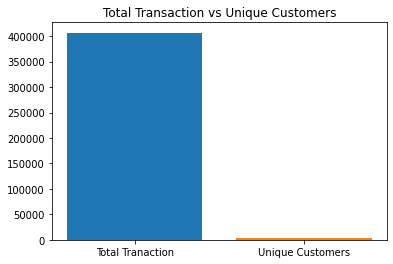

In [59]:
# Plotting a bar graph of total transaction vs number of registered customers.
plt.bar('Total Tranaction', number_of_transactions)
plt.bar('Unique Customers', number_of_unique_customers)
plt.title('Total Transaction vs Unique Customers')
plt.show()

In [67]:
# Cleaning the data for the segmentation of the data.
# Getting the unique InvoiceID of unique Customer inorder to find the number of  transactions done a perticular customer.
# No. of transaction will tell us about the consistency of the customer.
unique_bills = pd.DataFrame(data.groupby('CustomerID')['InvoiceNo'].unique())
unique_bills['CustomerID'] = unique_bills.index
unique_bills['Transaction'] = unique_bills['InvoiceNo'].str.len()

In [68]:
# Keeping only required features and removing the other.
# Invoice number, description, Invoice date, stockcode, and country is not that much of importance as per the problem
df = data.iloc[:, [3, 5, 6]]

In [69]:
# Calculating the total amount purchased by each customer, grouping the dataset by CustomerID
df['Amount'] = df['Quantity'] * df['UnitPrice']
df = df.iloc[:, 2: ]
df_group = pd.DataFrame(df.groupby('CustomerID').sum())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [70]:
# Processing the Amount spent by each customer for shopping.
unique_bills = pd.DataFrame(unique_bills.iloc[:, 2])
unique_bills['Amount'] = df_group['Amount']

In [83]:
# Inspecting the different Quantiles for outliers.
print(unique_bills.describe().round(2), end = '\n \n')
print('Transaction and Amount for values at 5th Percentile')
print(unique_bills.quantile(0.05), end = '\n \n')
print('Transaction and Amount for values at 80th Percentile')
print(unique_bills.quantile(0.80))

       Transaction     Amount
count      4372.00    4372.00
mean          5.08    1898.46
std           9.34    8219.35
min           1.00   -4287.63
25%           1.00     293.36
50%           3.00     648.08
75%           5.00    1611.72
max         248.00  279489.02
 
Transaction and Amount for values at 5th Percentile
Transaction      1.0000
Amount         101.1385
Name: 0.05, dtype: float64
 
Transaction and Amount for values at 80th Percentile
Transaction       7.000
Amount         2002.092
Name: 0.8, dtype: float64


**Infromation Gained:** From the above we can conclude that the data below 5th percentile is corrupted or wrong, and values above 80th percentile is increase drastically that means it is exception that is need to be handle.
A small section of society have a lot of money, we sould ignore than while processing for general society.

In [73]:
# data below and above 0.05, 0.80 percentile respectively are outliers.
lower_bound = unique_bills.quantile(0.05)['Amount'].round(2)
upper_bound = unique_bills.quantile(0.80)['Amount'].round(2)

# Valid values are those which lies between lower and upper bound.
valid_values = unique_bills[(unique_bills['Amount'] >= lower_bound)]
valid_values = valid_values[(unique_bills['Amount'] <= upper_bound)]
print(f'Total number of valid data points: {len(valid_values)}')

Total number of valid data points: 3278


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [74]:
# Creating the final variable for the clustering
x = valid_values.values
valid_values.head()

,Transaction,Amount
CustomerID,,
12348.0,4,1797.24
12349.0,1,1757.55
12350.0,1,334.40
12352.0,11,1545.41
12354.0,1,1079.40


**Using KMeans Clustering:** KMeans clustering is used for finding optimal clusters in given data. We are using Elbow Method to obtain the optimal number of clusters.

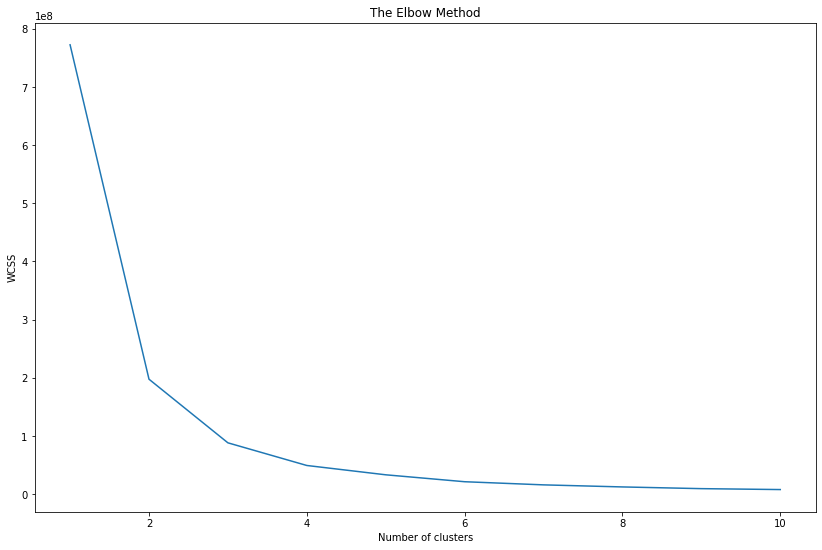

In [85]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(14, 9))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above we can conclude to have 4 clusters, as the solve till 4 cluster is very steep.

In [75]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

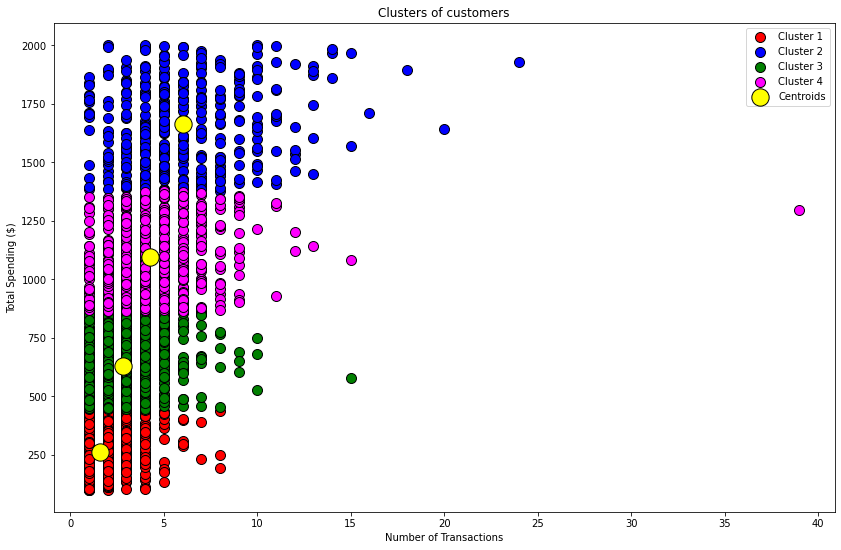

In [84]:
# Visualising the clusters
plt.figure(figsize=(14, 9))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1', edgecolor = 'black')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2', edgecolor = 'black')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3', edgecolor = 'black')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4', edgecolor = 'black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids', edgecolor = 'black')
plt.title('Clusters of customers')
plt.ylabel('Total Spending ($)')
plt.xlabel('Number of Transactions')
plt.legend()
plt.show()

By the above processes we have obtained the above shown 4 clusters. With a centoid overwhich datapoints are being clustered. 
These are the possible cluster to segment the customers.